<a href="https://colab.research.google.com/github/candido05/Repositorio-do-livro-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow-/blob/main/Capitulo15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 15 - Processamento de Sequências usando RNNs e CNNs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Previsão de uma Série Temporal

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

* Métricas de baseline

In [4]:
y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.1327 - val_loss: 0.0479
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0363 - val_loss: 0.0310
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0248 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0184 - val_loss: 0.0170
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.007

* Implementando uma RNN simples

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.1033 - val_loss: 0.0434
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0340 - val_loss: 0.0278
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0241 - val_loss: 0.0209
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0191 - val_loss: 0.0171
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0142 - val_loss: 0.0131
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 10/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0115 - val_loss: 0.

* RNNs profundas

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 9s 27ms/step - loss: 0.0807 - val_loss: 0.0107
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0086 - val_loss: 0.0060
Epoch 3/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 4/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 5/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 6/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 7/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 9/20
219/219 [==============================] - 6s 25ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 10/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0037 - val_l

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 6s 20ms/step - loss: 0.0334 - val_loss: 0.0062
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 9/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - val_lo

In [9]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 8ms/step - loss: 0.0026


0.0026497358921915293

* Previsão de diversos intervalos de tempo futuros

In [10]:
np.random.seed(43)

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 40ms/step


In [11]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [12]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

63/63 [==============================] - 0s 6ms/step


In [13]:
Y_pred.shape

(2000, 10)

In [14]:
np.mean(tf.keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.02162008

In [15]:
Y_naive_pred = np.tile(X_valid[:, -1], 10)
np.mean(tf.keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.25697407

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1229 - val_loss: 0.0630
Epoch 2/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0515 - val_loss: 0.0436
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.0356
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.0315
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.0289
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0271
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0264 - val_loss: 0.0256
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.0243
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0241 - val_loss: 0.0235
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0232 - val_loss: 0.0227

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 19ms/step - loss: 0.0610 - val_loss: 0.0294
Epoch 2/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0246 - val_loss: 0.0183
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0164 - val_loss: 0.0143
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 5/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0128 - val_loss: 0.0111
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0119 - val_loss: 0.0103
Epoch 7/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 8/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 10/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0104 - val_lo

In [18]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])


In [20]:
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 21ms/step - loss: 0.0531 - last_time_step_mse: 0.0433 - val_loss: 0.0430 - val_last_time_step_mse: 0.0323
Epoch 2/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0388 - last_time_step_mse: 0.0272 - val_loss: 0.0348 - val_last_time_step_mse: 0.0238
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0322 - last_time_step_mse: 0.0203 - val_loss: 0.0303 - val_last_time_step_mse: 0.0182
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0296 - last_time_step_mse: 0.0175 - val_loss: 0.0282 - val_last_time_step_mse: 0.0176
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0272 - last_time_step_mse: 0.0151 - val_loss: 0.0257 - val_last_time_step_mse: 0.0133
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0259 - last_time_step_mse: 0.0138 - val_loss: 0.0249 - val_last_time_step_mse: 0.0124
Epoch 7/20
219/219 [==

### Lidando com Sequências Longas

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 9s 28ms/step - loss: 0.1969 - last_time_step_mse: 0.1863 - val_loss: 0.0750 - val_last_time_step_mse: 0.0671
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0543 - last_time_step_mse: 0.0433 - val_loss: 0.0504 - val_last_time_step_mse: 0.0396
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0471 - last_time_step_mse: 0.0362 - val_loss: 0.0456 - val_last_time_step_mse: 0.0340
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0436 - last_time_step_mse: 0.0327 - val_loss: 0.0424 - val_last_time_step_mse: 0.0319
Epoch 5/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0411 - last_time_step_mse: 0.0305 - val_loss: 0.0407 - val_last_time_step_mse: 0.0298
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0392 - last_time_step_mse: 0.0286 - val_loss: 0.0387 - val_last_time_step_mse: 0.0281
Epoch 7/20
219/219 [==

In [22]:
class LNSimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = tf.keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.activation = tf.keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 46ms/step - loss: 0.1118 - last_time_step_mse: 0.1043 - val_loss: 0.0612 - val_last_time_step_mse: 0.0497
Epoch 2/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0582 - last_time_step_mse: 0.0474 - val_loss: 0.0552 - val_last_time_step_mse: 0.0457
Epoch 3/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0526 - last_time_step_mse: 0.0419 - val_loss: 0.0499 - val_last_time_step_mse: 0.0393
Epoch 4/20
219/219 [==============================] - 10s 46ms/step - loss: 0.0480 - last_time_step_mse: 0.0366 - val_loss: 0.0453 - val_last_time_step_mse: 0.0343
Epoch 5/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0437 - last_time_step_mse: 0.0319 - val_loss: 0.0418 - val_last_time_step_mse: 0.0310
Epoch 6/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0403 - last_time_step_mse: 0.0282 - val_loss: 0.0383 - val_last_time_step_mse: 0.0259
Epoch 7/20
219/219 

### Lidando com o problema de memória de curto prazo

* LSTM

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 43ms/step - loss: 0.0801 - last_time_step_mse: 0.0664 - val_loss: 0.0544 - val_last_time_step_mse: 0.0341
Epoch 2/20
219/219 [==============================] - 9s 41ms/step - loss: 0.0467 - last_time_step_mse: 0.0261 - val_loss: 0.0418 - val_last_time_step_mse: 0.0214
Epoch 3/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0384 - last_time_step_mse: 0.0180 - val_loss: 0.0363 - val_last_time_step_mse: 0.0161
Epoch 4/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0348 - last_time_step_mse: 0.0155 - val_loss: 0.0335 - val_last_time_step_mse: 0.0139
Epoch 5/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0328 - last_time_step_mse: 0.0144 - val_loss: 0.0322 - val_last_time_step_mse: 0.0138
Epoch 6/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0313 - last_time_step_mse: 0.0133 - val_loss: 0.0305 - val_last_time_step_mse: 0.0130
Epoch 7/20
219/219 [=

* GRU

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 14s 43ms/step - loss: 0.0772 - last_time_step_mse: 0.0688 - val_loss: 0.0550 - val_last_time_step_mse: 0.0441
Epoch 2/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0493 - last_time_step_mse: 0.0389 - val_loss: 0.0455 - val_last_time_step_mse: 0.0348
Epoch 3/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0440 - last_time_step_mse: 0.0332 - val_loss: 0.0421 - val_last_time_step_mse: 0.0307
Epoch 4/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0409 - last_time_step_mse: 0.0300 - val_loss: 0.0384 - val_last_time_step_mse: 0.0268
Epoch 5/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0363 - last_time_step_mse: 0.0252 - val_loss: 0.0345 - val_last_time_step_mse: 0.0221
Epoch 6/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0321 - last_time_step_mse: 0.0182 - val_loss: 0.0300 - val_last_time_step_mse: 0.0147
Epoch 7/20
219/219 [=

* Usando camadas convolucionais 1D para processar sequências

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.GRU(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 11s 28ms/step - loss: 0.0666 - last_time_step_mse: 0.0583 - val_loss: 0.0455 - val_last_time_step_mse: 0.0360
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0393 - last_time_step_mse: 0.0316 - val_loss: 0.0348 - val_last_time_step_mse: 0.0267
Epoch 3/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0324 - last_time_step_mse: 0.0246 - val_loss: 0.0302 - val_last_time_step_mse: 0.0216
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0283 - last_time_step_mse: 0.0188 - val_loss: 0.0267 - val_last_time_step_mse: 0.0170
Epoch 5/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0256 - last_time_step_mse: 0.0151 - val_loss: 0.0252 - val_last_time_step_mse: 0.0146
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0240 - last_time_step_mse: 0.0133 - val_loss: 0.0233 - val_last_time_step_mse: 0.0124
Epoch 7/20
219/219 [=

* WaveNet

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(tf.keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 5s 13ms/step - loss: 0.0647 - last_time_step_mse: 0.0511 - val_loss: 0.0367 - val_last_time_step_mse: 0.0219
Epoch 2/20
219/219 [==============================] - 3s 11ms/step - loss: 0.0329 - last_time_step_mse: 0.0194 - val_loss: 0.0301 - val_last_time_step_mse: 0.0171
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0292 - last_time_step_mse: 0.0164 - val_loss: 0.0286 - val_last_time_step_mse: 0.0165
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0274 - last_time_step_mse: 0.0147 - val_loss: 0.0266 - val_last_time_step_mse: 0.0139
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0262 - last_time_step_mse: 0.0136 - val_loss: 0.0255 - val_last_time_step_mse: 0.0130
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0250 - last_time_step_mse: 0.0124 - val_loss: 0.0244 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [==

# Exercícios

### 9.

In [2]:
from pathlib import Path

DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = tf.keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

1065301781/1065301781 [==============================] - 30s 0us/step


In [3]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [4]:
train_files

['/root/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [5]:
eval_files

['/root/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [6]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [7]:
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [8]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [9]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [10]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [11]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [12]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.16666669  0.          0.        ]
  [-0.13963962  0.01968504  0.        ]
  [-0.07657659  0.03149606  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.03137255 -0.0518868   0.        ]
  [ 0.         -0.1226415   0.        ]
  [ 0.05882353 -0.07547169  0.        ]
  ...
  [ 0.01960784 -0.01886794  0.        ]
  [-0.01176471 -0.03301886  0.        ]
  [-0.0745098   0.          1.        ]]

 [[-0.07792208 -0.21176471  0.        ]
  [ 0.05194805 -0.01568628  0.        ]
  [ 0.10389611  0.01176471  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.0041841  -0.26377952  0.        ]
  [ 0.0251046  -0.0944882   0.        ]
  [ 0.0669456  -0.10236219  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

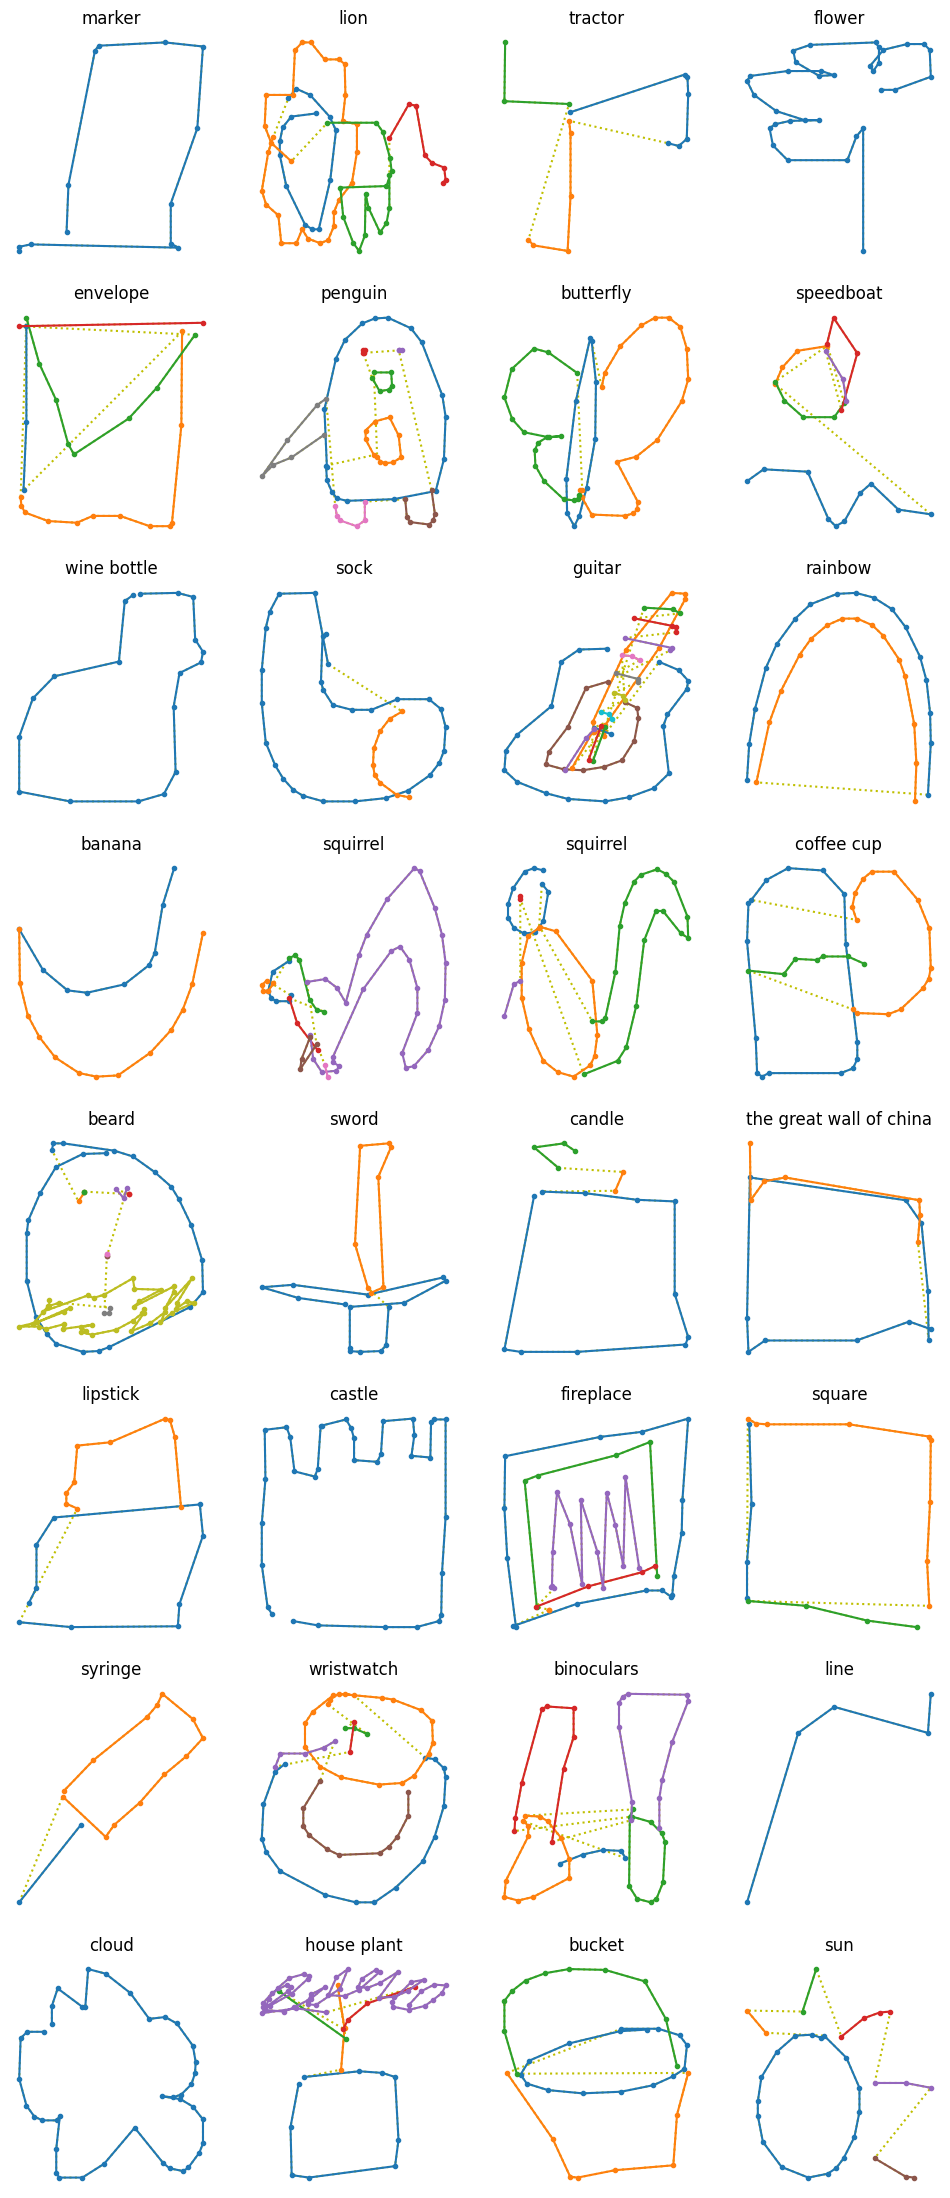

In [13]:
from matplotlib import pyplot as plt

def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

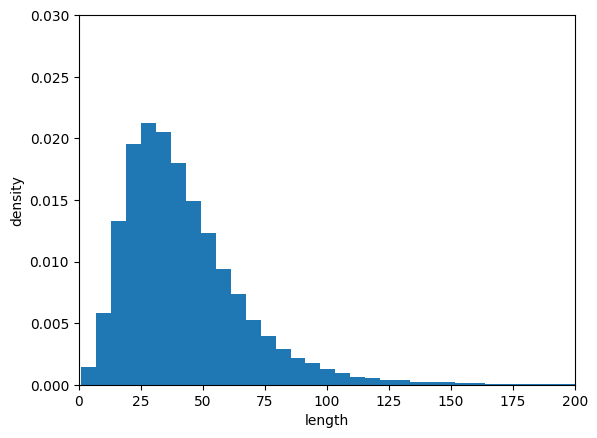

In [14]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [15]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 1482s 14ms/step - loss: 4.1284 - accuracy: 0.1625 - sparse_top_k_categorical_accuracy: 0.3626 - val_loss: 3.0452 - val_accuracy: 0.3167 - val_sparse_top_k_categorical_accuracy: 0.6017
Epoch 2/2
107813/107813 [==============================] - 1572s 15ms/step - loss: 2.7119 - accuracy: 0.3777 - sparse_top_k_categorical_accuracy: 0.6673 - val_loss: 2.4333 - val_accuracy: 0.4324 - val_sparse_top_k_categorical_accuracy: 0.7202


In [21]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

5392/5392 [==============================] - 23s 4ms/step


In [22]:
np.mean(tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

0.60304415

1/1 [==============================] - 0s 23ms/step


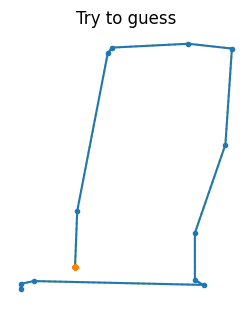

Top-5 predictions:
  1. triangle 55.596%
  2. toothbrush 11.352%
  3. hat 4.492%
  4. hockey stick 2.714%
  5. clarinet 2.571%
Answer: marker


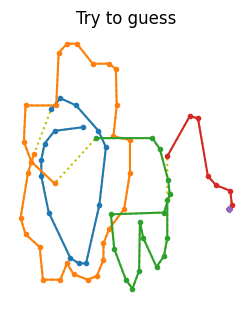

Top-5 predictions:
  1. lion 38.356%
  2. elephant 6.506%
  3. bat 6.309%
  4. camouflage 5.180%
  5. butterfly 4.633%
Answer: lion


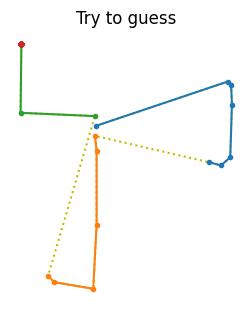

Top-5 predictions:
  1. knee 12.809%
  2. hexagon 11.023%
  3. octagon 5.336%
  4. see saw 5.003%
  5. fork 4.582%
Answer: tractor


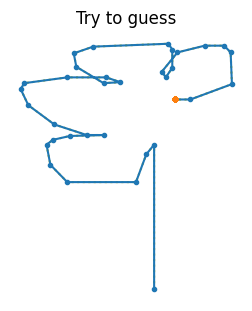

Top-5 predictions:
  1. palm tree 76.688%
  2. flower 8.600%
  3. tree 2.234%
  4. matches 1.975%
  5. broccoli 1.609%
Answer: flower


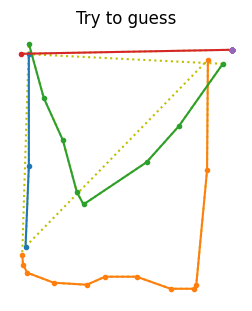

Top-5 predictions:
  1. envelope 30.361%
  2. picture frame 5.415%
  3. dishwasher 4.578%
  4. dresser 4.434%
  5. book 4.353%
Answer: envelope


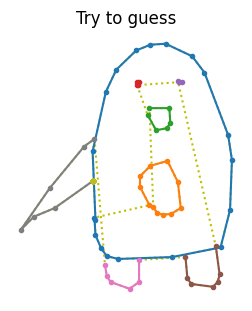

Top-5 predictions:
  1. penguin 56.960%
  2. frog 8.162%
  3. sea turtle 4.854%
  4. owl 2.651%
  5. bear 2.070%
Answer: penguin


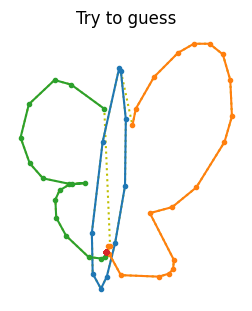

Top-5 predictions:
  1. butterfly 95.755%
  2. bowtie 0.563%
  3. squirrel 0.495%
  4. bat 0.470%
  5. backpack 0.319%
Answer: butterfly


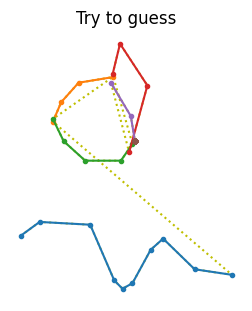

Top-5 predictions:
  1. beach 12.993%
  2. stitches 10.418%
  3. fork 7.932%
  4. river 7.437%
  5. the great wall of china 3.221%
Answer: speedboat


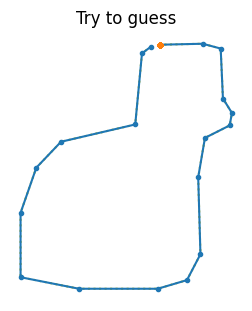

Top-5 predictions:
  1. octagon 13.848%
  2. hexagon 13.752%
  3. wine bottle 11.732%
  4. potato 11.707%
  5. bread 5.462%
Answer: wine bottle


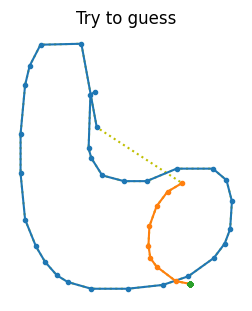

Top-5 predictions:
  1. sock 38.621%
  2. shoe 17.468%
  3. snorkel 15.363%
  4. swan 6.828%
  5. saxophone 3.631%
Answer: sock


In [24]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
    plt.figure(figsize=(3, 3.5))
    draw_sketch(sketches[index])
    plt.show()
    print("Top-5 predictions:".format(index + 1))
    for k in range(5):
        class_name = class_names[top_k.indices[index, k]]
        proba = 100 * top_k.values[index, k]
        print("  {}. {} {:.3f}%".format(k + 1, class_name, proba))
    print("Answer: {}".format(class_names[labels[index].numpy()]))